In [118]:
import numpy as np
import pandas as pd
%matplotlib inline

# Data

## Training data

In [149]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
train.dtypes
def set_category_type(df):
    # train.Survived = train.Survived.astype('bool')
    df.Sex = df.Sex.astype('category')
    print "sex:", df.Sex.cat.categories
    df.Pclass = df.Pclass.astype('category')
    print "pclass:", df.Pclass.cat.categories
    df.Embarked = df.Embarked.astype('category')
    print "embarked:", df.Embarked.cat.categories
    # train.set_index('PassengerId', inplace=True)

set_category_type(train)
# values
train.describe()

sex: Index([u'female', u'male'], dtype='object')
pclass: Int64Index([1, 2, 3], dtype='int64')
embarked: Index([u'C', u'Q', u'S'], dtype='object')


,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


- We know that women and children were more likely to survive, so Age and Sex are probably good predictors. 
- passenger class might affect the outcome, because first class cabins were closer to the deck of the ship.
- Family size (the number of siblings and parents/children) will probably be correlated with survival one way or the other. That's because there would either be more people to help you, or more people to think about trying to save.
- There may be links between survival and columns like Ticket, Name, and Embarked (because people who boarded at certain ports may have had cabins closer or farther away from the top of the ship), 

In [121]:
train.Parch.cat.categories

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

### Missing values

% of missing value too high. we replace by median

In [152]:
print train.shape
print train.isnull().sum()
print "% of NaN: ", 177/891.

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
% of NaN:  0.198653198653


In [153]:
def check_null(test):
    # NaN analysis
    feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    for col in test.columns:
        print col, test[col].isnull().sum()
check_null(train)        

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [124]:
# print test.Age.median()
mode = test.Embarked.mode()
mode[0]

'S'

In [154]:
def nan_processing(df):
    # replace nan with mean (or median if distribution is skewed?)
    # drop ticket & cabin
    df['Age'] = df['Age'].fillna(df['Age'].median())
    # replace missing category with node
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    return df.drop(['Ticket','Cabin', 'Name', 'PassengerId'], axis=1)

train = nan_processing(train)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Survival: Class, Boarding location, Age 

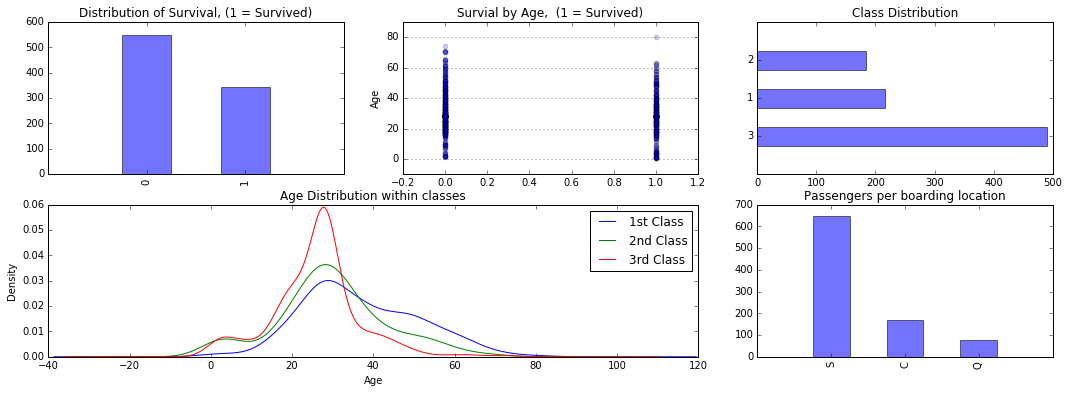

In [126]:
df = train
# specifies the parameters of our graphs
# fig = plt.figure(figsize=(18,6), dpi=1600) 
fig = plt.figure(figsize=(18,6))
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survial by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

## Gender

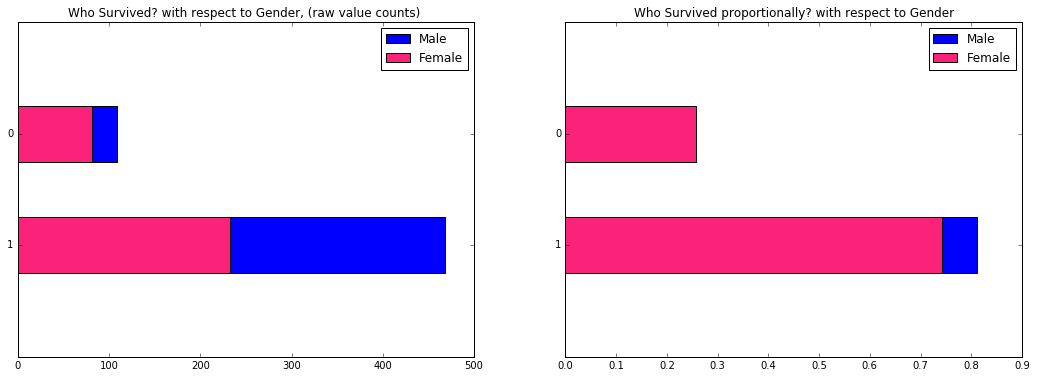

In [127]:
fig = plt.figure(figsize=(18,6))

# create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 
# 'barh' is just a horizontal bar graph
ax1 = fig.add_subplot(121)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='barh',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='barh', color='#FA2379',label='Female')
ax1.set_ylim(-1, 2) 
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')


# adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='barh',label='Male')  
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='barh', color='#FA2379',label='Female')
ax2.set_ylim(-1, 2)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

In [171]:
def encode_features(df):
    # from sklearn_pandas import DataFrameMapper
    # from sklearn.preprocessing import OneHotEncoder
    sex = pd.get_dummies(df.Sex, prefix='sex')
    embarked = pd.get_dummies(df.Embarked, prefix='embarked')
    pclass = pd.get_dummies(df.Pclass, prefix='class')
    # survived = pd.get_dummies(train.Survived, prefix='survived')
    return pd.concat([pclass, sex, embarked, df['SibSp'], df['Parch'], df['Age'], df['Fare']], axis=1)

X = encode_features(train)

In [10]:
y = train.Survived

In [172]:
X.head()

,class_1,class_2,class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,SibSp,Parch,Age,Fare
0,0,0,1,0,1,0,0,1,1,0,22.0,7.2500
1,1,0,0,1,0,1,0,0,1,0,38.0,71.2833
2,0,0,1,1,0,0,0,1,0,0,26.0,7.9250
3,1,0,0,1,0,0,0,1,1,0,35.0,53.1000
4,0,0,1,0,1,0,0,1,0,0,35.0,8.0500


In [159]:
X.isnull().sum()

class_1       0
class_2       0
class_3       0
sex_female    0
sex_male      0
embarked_C    0
embarked_Q    0
embarked_S    0
SibSp         0
Parch         0
Age           0
Fare          0
dtype: int64

In [160]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import cross_validation
#predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
model = LogisticRegression()
kf = cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
predictions = []

# for train, test in kf:
#     train_predictors = (X.iloc[train,:])
#     # The target we're using to train the algorithm
#     train_target = y.iloc[train]
#     # Training the algorithm using the predictors and target
#     model.fit(train_predictors, train_target)
#     # We can now make predictions on the test fold
#     test_predictions = model.predict(X.iloc[test,:])
#     predictions.append(test_predictions)
scores = cross_validation.cross_val_score(model, X, y, cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.791245791246


In [161]:
print scores

[ 0.7979798   0.78114478  0.79461279]


# Test Data

In [182]:
test = pd.read_csv("test.csv")

In [183]:
# one missing value in Fare
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [184]:
#set_category_type(test)
id = test['PassengerId']
test.Sex = test.Sex.astype('category')
test.Pclass = test.Pclass.astype('category')
test.Embarked = test.Embarked.astype('category')
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [164]:
check_null(test)
# test['Fare'] = test['Fare'].fillna(test['Fare'].median())

Pclass 0
Sex 0
Age 86
SibSp 0
Parch 0
Fare 1
Embarked 0


In [165]:
test['Age'] = df['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
check_null(test)

Pclass 0
Sex 0
Age 0
SibSp 0
Parch 0
Fare 0
Embarked 0


In [173]:
X_test = encode_features(test)
# y = test_.Survived
X_test.head()

,class_1,class_2,class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,SibSp,Parch,Age,Fare
0,0,0,1,0,1,0,1,0,0,0,22.0,7.8292
1,0,0,1,1,0,0,0,1,1,0,38.0,7.0000
2,0,1,0,0,1,0,1,0,0,0,26.0,9.6875
3,0,0,1,0,1,0,0,1,0,0,35.0,8.6625
4,0,0,1,1,0,0,0,1,1,1,35.0,12.2875


In [174]:
# X_test.columns
check_null(X_test)
# X_test.isnull().sum()

class_1 0
class_2 0
class_3 0
sex_female 0
sex_male 0
embarked_C 0
embarked_Q 0
embarked_S 0
SibSp 0
Parch 0
Age 0
Fare 0


In [175]:
model = LogisticRegression()
model.fit(X, y)
test_predictions = model.predict(X_test)

In [193]:
# pd.DataFrame([id,test_predictions], columns=['PassengerId', 'Survived'])
d = {'PassengerId': id, 'Survived': test_predictions}
df = pd.DataFrame(d)
df.head()
df.to_csv('submission.csv', index=None)